<a href="https://colab.research.google.com/github/SenolIsci/finance_portfolio_optimization_mean_variance_optimization/blob/main/SP500_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/projects/timeseries')
!ls

data source

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=INTC&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=TSLA&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=LON.IAG&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

In [ ]:
os.listdir('./data')


In [ ]:
sym_list=[i.split('_')[2].split('.')[0] for i in os.listdir('./data') if i.split('_')[0]=='daily']
sym_list

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [ ]:
df_all=pd.DataFrame({})
for i in os.listdir('./data'):
  if i.split('_')[0]=='daily':
    sym=i.split('_')[2].split('.')[0]   
    df=pd.read_csv(''.join(["./data/", str(i)]),names=["timestamp",	"open",	"high",	"low",	"close",	"adjusted_close",	"volume",	"dividend_amount",	"split_coefficient"],header=0, thousands=',')
    df.columns=["date",	"open",	"high",	"low",	"close",	"adjusted_close",	"volume",	"dividend_amount",	"split_coefficient"]
    df['Name']=sym
    df=df.iloc[::-1].reset_index(drop=True)


    df_all=pd.concat([df_all,df],axis=0)
df_all['date']=df_all['date'].apply(pd.to_datetime)
df_all=df_all.set_index('date',drop=True)
df_all.to_csv('./data/'+'all_stocks_5yr.csv',index=True)
df_all.columns

Index(['open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'dividend_amount', 'split_coefficient', 'Name'],
      dtype='object')

In [ ]:
selected_column=['adjusted_close']

In [ ]:

df_all

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
date,,,,,,,,,
2010-06-29,19.000,25.0000,17.540,23.890,4.778,18766300,0.0,1.0,TSLA
2010-06-30,25.790,30.4192,23.300,23.830,4.766,17187100,0.0,1.0,TSLA
2010-07-01,25.000,25.9200,20.270,21.960,4.392,8218800,0.0,1.0,TSLA
2010-07-02,23.000,23.1000,18.710,19.200,3.840,5139800,0.0,1.0,TSLA
2010-07-06,20.000,20.0000,15.830,16.110,3.222,6866900,0.0,1.0,TSLA
...,...,...,...,...,...,...,...,...,...
2020-12-04,10.900,10.9280,10.780,10.892,10.892,0,0.0,0.0,IQQH
2020-12-07,10.968,11.0280,10.894,10.950,10.950,0,0.0,0.0,IQQH
2020-12-08,11.010,11.1900,10.972,11.182,11.182,0,0.0,0.0,IQQH


In [ ]:
symbols = df_all['Name'].unique().tolist()
symbols

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [ ]:
df=df_all
df

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
date,,,,,,,,,
2010-06-29,19.000,25.0000,17.540,23.890,4.778,18766300,0.0,1.0,TSLA
2010-06-30,25.790,30.4192,23.300,23.830,4.766,17187100,0.0,1.0,TSLA
2010-07-01,25.000,25.9200,20.270,21.960,4.392,8218800,0.0,1.0,TSLA
2010-07-02,23.000,23.1000,18.710,19.200,3.840,5139800,0.0,1.0,TSLA
2010-07-06,20.000,20.0000,15.830,16.110,3.222,6866900,0.0,1.0,TSLA
...,...,...,...,...,...,...,...,...,...
2020-12-04,10.900,10.9280,10.780,10.892,10.892,0,0.0,0.0,IQQH
2020-12-07,10.968,11.0280,10.894,10.950,10.950,0,0.0,0.0,IQQH
2020-12-08,11.010,11.1900,10.972,11.182,11.182,0,0.0,0.0,IQQH


In [ ]:
symbols

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [ ]:
daterange=df_all.index.unique().sort_values()

In [ ]:
daterange


DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12',
               ...
               '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10'],
              dtype='datetime64[ns]', name='date', length=5350, freq=None)

In [ ]:
close_prices = pd.DataFrame(index=daterange)

In [ ]:
# Let's now fill in our close prices dataframe
for symbol in symbols:
  df_sym = df[df['Name'] == symbol]

  df_tmp = df_sym[selected_column]
  df_tmp.columns=[symbol]

  close_prices=pd.concat([close_prices,df_tmp],axis=1)

In [ ]:
#5 years
close_prices=close_prices['2015-11-24':'2020-11-24'].copy()

In [ ]:
close_prices

,TSLA,INTC,AMD,AAPL,MSFT,GOOG,FB,IBM,SPY500,BNTX,NIO,SRNE,CVAC,MRNA,IQQH
date,,,,,,,,,,,,,,,
2015-11-24,43.650,30.047693,2.34,27.531251,49.508739,748.28,105.74,111.511481,189.655828,NaN,NaN,8.58,NaN,NaN,5.080
2015-11-25,45.928,30.126397,2.38,27.334400,48.997681,748.15,105.41,111.028747,189.628650,NaN,NaN,8.41,NaN,NaN,5.120
2015-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.150
2015-11-27,46.322,30.135142,2.33,27.283451,49.216706,750.26,105.45,111.398843,189.846073,NaN,NaN,8.36,NaN,NaN,5.120
2015-11-30,46.052,30.406236,2.36,27.396929,49.599999,742.60,104.24,112.171217,189.057916,NaN,NaN,8.01,NaN,NaN,5.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,486.640,45.060000,82.54,118.030000,211.080000,1746.78,271.97,116.770000,356.280000,90.44,45.06,6.85,74.64,88.89,10.516
2020-11-19,499.270,45.620000,85.54,118.640000,212.420000,1763.92,272.94,117.180000,357.780000,94.93,48.45,7.65,75.20,92.77,10.518
2020-11-20,489.610,45.390000,84.64,117.340000,210.390000,1742.19,269.70,116.940000,355.330000,104.07,49.25,7.56,79.69,97.61,10.664


In [ ]:
close_prices.to_csv('./data/sp500_close.csv')

In [ ]:
close_prices_org = pd.read_csv('./data/sp500_close.csv', index_col=0, parse_dates=True)


In [ ]:
len(close_prices_org)

1292

In [ ]:
close_prices_org


,TSLA,INTC,AMD,AAPL,MSFT,GOOG,FB,IBM,SPY500,BNTX,NIO,SRNE,CVAC,MRNA,IQQH
date,,,,,,,,,,,,,,,
2015-11-24,43.650,30.047693,2.34,27.531251,49.508739,748.28,105.74,111.511481,189.655828,NaN,NaN,8.58,NaN,NaN,5.080
2015-11-25,45.928,30.126397,2.38,27.334400,48.997681,748.15,105.41,111.028747,189.628650,NaN,NaN,8.41,NaN,NaN,5.120
2015-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.150
2015-11-27,46.322,30.135142,2.33,27.283451,49.216706,750.26,105.45,111.398843,189.846073,NaN,NaN,8.36,NaN,NaN,5.120
2015-11-30,46.052,30.406236,2.36,27.396929,49.599999,742.60,104.24,112.171217,189.057916,NaN,NaN,8.01,NaN,NaN,5.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,486.640,45.060000,82.54,118.030000,211.080000,1746.78,271.97,116.770000,356.280000,90.44,45.06,6.85,74.64,88.89,10.516
2020-11-19,499.270,45.620000,85.54,118.640000,212.420000,1763.92,272.94,117.180000,357.780000,94.93,48.45,7.65,75.20,92.77,10.518
2020-11-20,489.610,45.390000,84.64,117.340000,210.390000,1742.19,269.70,116.940000,355.330000,104.07,49.25,7.56,79.69,97.61,10.664


In [ ]:
close_prices_org.index.min()


Timestamp('2015-11-24 00:00:00')

In [ ]:
#selected_symbols=['BNTX','TSLA','AAPL','SPY500']
#selected_symbols=['BNTX','MSFT','AAPL','AMD','NIO','SRNE','SPY500']
selected_symbols=['BNTX','AMD','IQQH','CVAC','MRNA','SPY500']
close_prices=close_prices_org[selected_symbols]



In [ ]:
close_prices

,BNTX,AMD,IQQH,CVAC,MRNA,SPY500
date,,,,,,
2015-11-24,NaN,2.34,5.080,NaN,NaN,189.655828
2015-11-25,NaN,2.38,5.120,NaN,NaN,189.628650
2015-11-26,NaN,NaN,5.150,NaN,NaN,NaN
2015-11-27,NaN,2.33,5.120,NaN,NaN,189.846073
2015-11-30,NaN,2.36,5.140,NaN,NaN,189.057916
...,...,...,...,...,...,...
2020-11-18,90.44,82.54,10.516,74.64,88.89,356.280000
2020-11-19,94.93,85.54,10.518,75.20,92.77,357.780000
2020-11-20,104.07,84.64,10.664,79.69,97.61,355.330000


In [ ]:
names=close_prices.columns.to_list()


In [ ]:
names

['BNTX', 'AMD', 'IQQH', 'CVAC', 'MRNA', 'SPY500']

In [ ]:
close_prices=close_prices.dropna(how='all')

In [ ]:
close_prices.isna().sum().sum()

3115

In [ ]:
close_prices.fillna(method='ffill', inplace=True)

In [ ]:
close_prices.fillna(method='bfill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

0

In [ ]:
close_prices

,BNTX,AMD,IQQH,CVAC,MRNA,SPY500
date,,,,,,
2015-11-24,14.24,2.34,5.080,55.90,18.60,189.655828
2015-11-25,14.24,2.38,5.120,55.90,18.60,189.628650
2015-11-26,14.24,2.38,5.150,55.90,18.60,189.628650
2015-11-27,14.24,2.33,5.120,55.90,18.60,189.846073
2015-11-30,14.24,2.36,5.140,55.90,18.60,189.057916
...,...,...,...,...,...,...
2020-11-18,90.44,82.54,10.516,74.64,88.89,356.280000
2020-11-19,94.93,85.54,10.518,75.20,92.77,357.780000
2020-11-20,104.07,84.64,10.664,79.69,97.61,355.330000


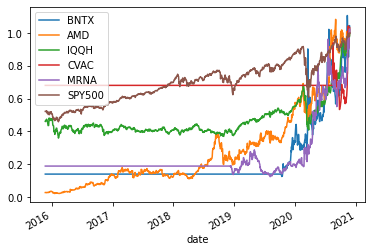

In [ ]:
(close_prices/close_prices.iloc[-1]).plot()

In [ ]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2015-11-24 to 2020-11-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BNTX    1292 non-null   float64
 1   AMD     1292 non-null   float64
 2   IQQH    1292 non-null   float64
 3   CVAC    1292 non-null   float64
 4   MRNA    1292 non-null   float64
 5   SPY500  1292 non-null   float64
dtypes: float64(6)
memory usage: 70.7 KB


In [ ]:
TOPERCENTAGE=100  #TOPERCENTAGE=1
TREASURYRATEYEARLY=0.01
BUSINESSDAYSINCALENDAR=252
INVESTDURATION=252


In [ ]:
returns=pd.DataFrame({})
for name in names:
  current_returns = close_prices[name].pct_change()
  returns[name]= current_returns.iloc[1:] * TOPERCENTAGE

 

In [ ]:
#drop SPY500 average
SPY=returns['SPY500']
del returns['SPY500']
names.remove('SPY500')

In [ ]:
returns_p=returns.copy()


In [ ]:
returns_p

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


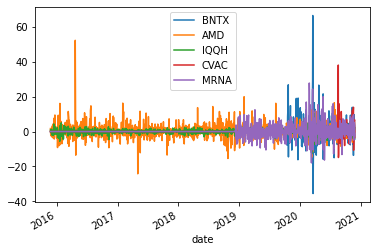

In [ ]:
returns_p.plot()

In [ ]:
returns

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


In [ ]:
mean_return = returns.mean()

In [ ]:
mean_return

BNTX    0.225714
AMD     0.358590
IQQH    0.071086
CVAC    0.043457
MRNA    0.178256
dtype: float64

In [ ]:
cov = returns.cov()


In [ ]:
cov

,BNTX,AMD,IQQH,CVAC,MRNA
BNTX,15.880629,0.839134,0.191574,0.501565,3.408007
AMD,0.839134,16.557837,1.551360,0.168911,0.938994
IQQH,0.191574,1.551360,2.200255,0.082454,0.177739
CVAC,0.501565,0.168911,0.082454,2.970463,0.600621
MRNA,3.408007,0.938994,0.177739,0.600621,10.086099


In [ ]:
np.sqrt(np.diagonal(cov))

array([3.98505064, 4.06913226, 1.48332556, 1.72350314, 3.17586195])

In [ ]:
cov

,BNTX,AMD,IQQH,CVAC,MRNA
BNTX,15.880629,0.839134,0.191574,0.501565,3.408007
AMD,0.839134,16.557837,1.551360,0.168911,0.938994
IQQH,0.191574,1.551360,2.200255,0.082454,0.177739
CVAC,0.501565,0.168911,0.082454,2.970463,0.600621
MRNA,3.408007,0.938994,0.177739,0.600621,10.086099


In [ ]:
cov_np = cov.to_numpy()

In [ ]:
def softmax(w):
  a = np.exp(w)
  return a / a.sum()
softmax([-1,-2])

array([0.73105858, 0.26894142])

In [ ]:
N = 10000
D = len(mean_return)
returns = np.zeros(N)
risks = np.zeros(N)
random_weights = []
for i in range(N):
  rand_range = 1.0
  w = np.random.random(D)*rand_range - rand_range / 2 # with short-selling
  w[-1] = 1 - w[:-1].sum()
  #w=softmax(w)
  #w=w/w.sum()
  np.random.shuffle(w)
  random_weights.append(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov_np).dot(w))
  returns[i] = ret
  risks[i] = risk
  #print(sum(w>1))
 



In [ ]:
sum(random_weights[5])

1.0

In [ ]:
single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

In [ ]:
#calculate for SPY500
spy_market_return = SPY.mean()
spy_market_risk = SPY.std()

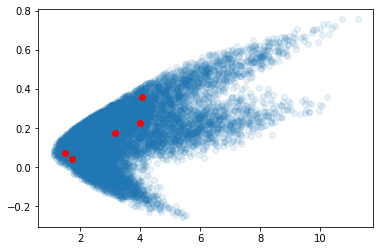

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.scatter(single_asset_risks, single_asset_returns, c='red');

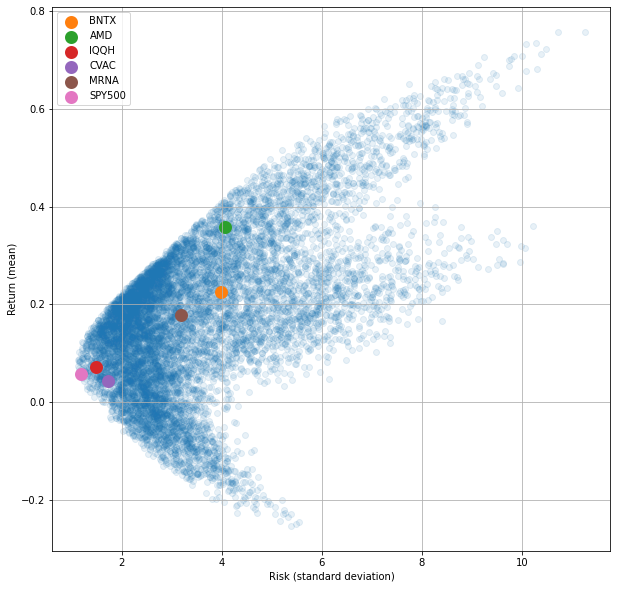

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(risks, returns, alpha=0.1);

for i in range(D):
  plt.scatter(single_asset_risks[i], single_asset_returns[i],label=names[i],linewidth=7);
plt.scatter(spy_market_risk, spy_market_return, label='SPY500',linewidth=7);
plt.xlabel('Risk (standard deviation)')
plt.ylabel('Return (mean)')
plt.legend()
plt.grid(True)


In [ ]:
random_weights[risks.argmax()]


array([-0.49270987,  2.77068888, -0.45504975, -0.40347579, -0.41945347])

In [ ]:

#max return max risk
pd.DataFrame([random_weights[risks.argmax()]],columns=names)

,BNTX,AMD,IQQH,CVAC,MRNA
0,-0.49271,2.770689,-0.45505,-0.403476,-0.419453


## Max and Min Return

In [ ]:
from scipy.optimize import linprog

In [ ]:
D = len(mean_return)

In [ ]:
A_eq = np.ones((1, D))
b_eq = np.ones(1)

In [ ]:
### NOTE: The bounds are by default (0, None) unless otherwise specified.
# bounds = None
bounds = [(-0.5, None)]*D
bounds = [(0.001, 0.999)]*D
#bounds = [(None,None)]*D
bounds

[(0.001, 0.999),
 (0.001, 0.999),
 (0.001, 0.999),
 (0.001, 0.999),
 (0.001, 0.999)]

In [ ]:
# minimize
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

     con: array([-3.97659683e-12])
     fun: 0.044116646438524205
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0.001, 0.001, 0.001, 0.996, 0.001])

In [ ]:
min_return = res.fun

In [ ]:
# maximize
res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

     con: array([-2.55129695e-09])
     fun: -0.35767381987881297
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0.001, 0.996, 0.001, 0.001, 0.001])

In [ ]:
max_return = -res.fun

In [ ]:
pd.DataFrame([res.x],columns=names)

,BNTX,AMD,IQQH,CVAC,MRNA
0,0.001,0.996,0.001,0.001,0.001


In [ ]:
min_return, max_return

(0.044116646438524205, 0.35767381987881297)

## Mean-Variance Optimal Portfolios

In [ ]:
N = 100
target_returns = np.linspace(min_return, max_return, num=N)

In [ ]:
from scipy.optimize import minimize

In [ ]:
def get_portfolio_variance(weights):
  return weights.dot(cov).dot(weights)

In [ ]:
def target_return_constraint(weights, target):
  return weights.dot(mean_return) - target

In [ ]:
def portfolio_constraint(weights):
  return weights.sum() - 1

In [ ]:
constraints = [
    {
        'type': 'eq',
        'fun': target_return_constraint,
        'args': [target_returns[0]], # will be updated in loop
    },
    {
        'type': 'eq',
        'fun': portfolio_constraint,
    }
]

In [ ]:
# check if it works
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
)
res

     fun: 1.3565723908089236
     jac: array([ 0.99845357, -0.25618772,  2.45849442,  2.71937497,  1.44657138])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.00567952, -0.06981725,  0.58783708,  0.43635221,  0.03994844])

In [ ]:
# Let's limit the magnitude of the weights
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
    bounds=bounds,
)
res

     fun: 2.949502112308818
     jac: array([1.03975704, 0.37624604, 0.17249092, 5.9198696 , 1.22565925])
 message: 'Optimization terminated successfully.'
    nfev: 29
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.001, 0.001, 0.001, 0.996, 0.001])

In [ ]:
optimized_risks = []
for target in target_returns:
  # set target return constraint
  constraints[0]['args'] = [target]

  res = minimize(
      fun=get_portfolio_variance,
      x0=np.ones(D) / D, # uniform
      method='SLSQP',
      constraints=constraints,
      bounds=bounds,
  )
  optimized_risks.append(np.sqrt(res.fun))
  if res.status != 0:
    print(res)

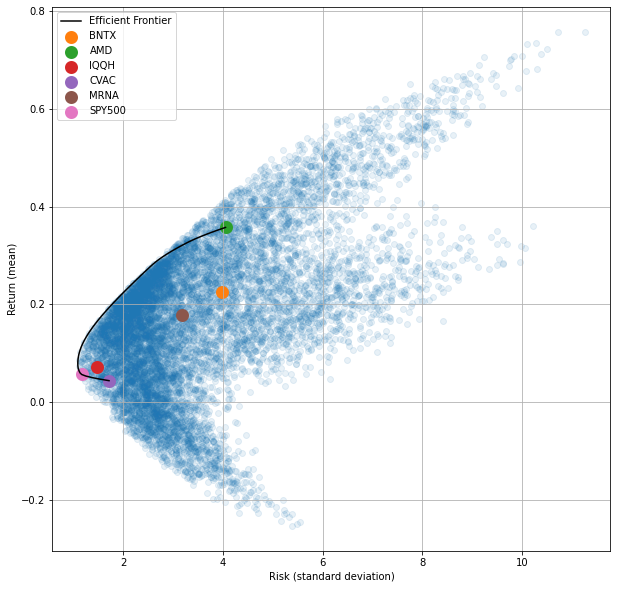

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black',label='Efficient Frontier');

for i in range(D):
  plt.scatter(single_asset_risks[i], single_asset_returns[i],label=names[i],linewidth=7);
plt.scatter(spy_market_risk, spy_market_return, label='SPY500',linewidth=7);
plt.xlabel('Risk (standard deviation)')
plt.ylabel('Return (mean)')
plt.legend()
plt.grid(True)


In [ ]:
# Min variance portfolio
# Let's limit the magnitude of the weights
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds,
)
res

     fun: 1.1906790693555798
     jac: array([2.38119802, 2.38257886, 2.38117494, 2.38171417, 2.3806961 ])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.04108957, 0.01447437, 0.50784513, 0.36445608, 0.07213486])

In [ ]:
mv_risk = np.sqrt(res.fun)
mv_weights = res.x
mv_ret = mv_weights.dot(mean_return)

In [ ]:
print(pd.DataFrame([mv_weights],columns=names))


      BNTX       AMD      IQQH      CVAC      MRNA
0  0.04109  0.014474  0.507845  0.364456  0.072135


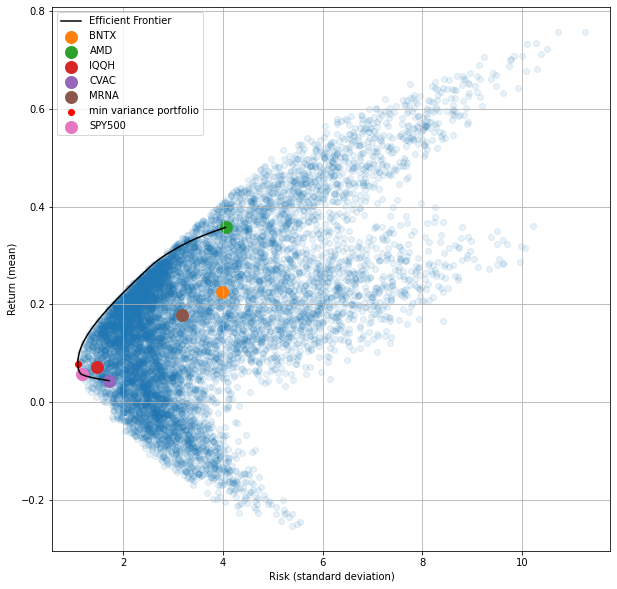

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black',label='Efficient Frontier');

for i in range(D):
  plt.scatter(single_asset_risks[i], single_asset_returns[i],label=names[i],linewidth=7);
plt.scatter([mv_risk], [mv_ret], c='red',label='min variance portfolio');
plt.scatter(spy_market_risk, spy_market_return, label='SPY500',linewidth=7);
plt.xlabel('Risk (standard deviation)')
plt.ylabel('Return (mean)')
plt.legend()
plt.grid(True)



## Sharpe Ratio

In [ ]:
# https://fred.stlouisfed.org/series/TB3MS
risk_free_rate = (TREASURYRATEYEARLY / BUSINESSDAYSINCALENDAR)*TOPERCENTAGE

In [ ]:
def neg_sharpe_ratio(weights):
  mean = weights.dot(mean_return)
  sd = np.sqrt(weights.dot(cov).dot(weights))
  return -(mean - risk_free_rate) / sd

In [ ]:
res = minimize(
    fun=neg_sharpe_ratio,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds,
)
res

     fun: -0.11046680812439684
     jac: array([-0.00213643, -0.00232156, -0.00265975, -0.00229597, -0.00173941])
 message: 'Optimization terminated successfully.'
    nfev: 70
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.16030308, 0.29816085, 0.23580385, 0.12332425, 0.18240797])

In [ ]:
best_sr, best_w = -res.fun, res.x

In [ ]:
mc_best_w = None
mc_best_sr = float('-inf')
for i, (risk, ret) in enumerate(zip(risks, returns)):
  sr = (ret - risk_free_rate) / risk
  if sr > mc_best_sr:
    mc_best_sr = sr
    mc_best_w = random_weights[i]
print(mc_best_w, mc_best_sr)

[0.14584779 0.29192838 0.32701155 0.06287432 0.17233796] 0.109905757268328


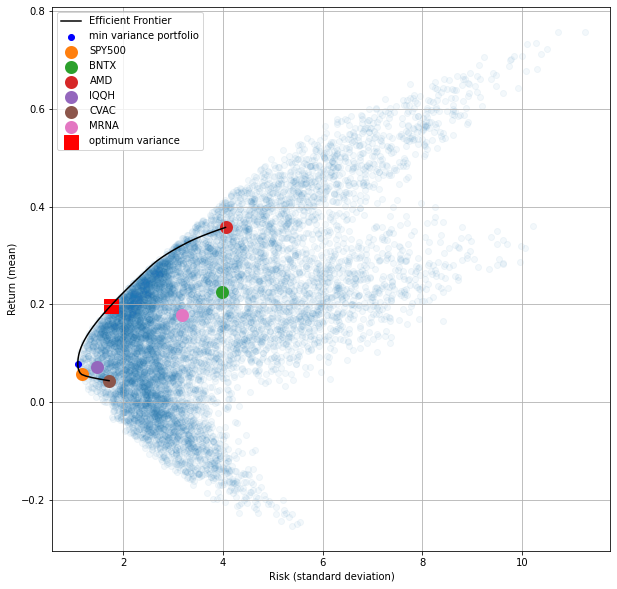

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(risks, returns, alpha=0.05);
plt.plot(optimized_risks, target_returns, c='black',label='Efficient Frontier');
plt.scatter([mv_risk], [mv_ret], c='blue',label='min variance portfolio');
plt.scatter(spy_market_risk, spy_market_return, label='SPY500',linewidth=7);


for i in range(D):
  plt.scatter(single_asset_risks[i], single_asset_returns[i],label=returns_p.columns[i],linewidth=7);
# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red',label='optimum variance',marker='s',s=200);

plt.xlabel('Risk (standard deviation)')
plt.ylabel('Return (mean)')

plt.legend()
plt.grid(True)


In [ ]:
print('OPTIMIZED PORTFOLIO')
dfw=pd.DataFrame([best_w],columns=names)
print(dfw)
print('optimized return',opt_ret)
print('optimized risk',opt_risk)

OPTIMIZED PORTFOLIO
       BNTX       AMD      IQQH      CVAC      MRNA
0  0.160303  0.298161  0.235804  0.123324  0.182408
optimized return 0.197736964756811
optimized risk 1.7540898852653892


In [ ]:
duration_days=INVESTDURATION

In [ ]:
rsk=pd.Series(single_asset_risks,index=names,name='DAILY RISK %')
rsk['OPT_PORTFOLIO']=opt_risk
rsk=rsk.round(2)
rtr=pd.Series(single_asset_returns,index=names,name='CUMULATIVE RETURN %')
rtr['OPT_PORTFOLIO']=opt_ret
rtr=(((1 + rtr/TOPERCENTAGE)**duration_days - 1)*TOPERCENTAGE).round(2)

wgh=pd.Series(best_w,index=names,name='WEIGTHS %')
wgh['OPT_PORTFOLIO']=1
wgh=(wgh*TOPERCENTAGE).round(2)

pd.DataFrame(rtr).join(rsk).join(wgh)






,CUMULATIVE RETURN %,DAILY RISK %,WEIGTHS %
BNTX,76.50,3.99,16.03
AMD,146.46,4.07,29.82
IQQH,19.61,1.48,23.58
CVAC,11.57,1.72,12.33
MRNA,56.64,3.18,18.24
OPT_PORTFOLIO,64.51,1.75,100.00


In [ ]:

#custom weights  alpy  
w_g=np.array([0.1,0.1,0.6,0.1,0.1])  
ret_g = mean_return.dot(w_g)
risk_g = np.sqrt(w_g.dot(cov_np).dot(w_g))
print("Alpy's custom portfolio daily mean %:\n",ret_g)
print("Alpy's custom potfolio daily risk %:\n",risk_g)
print("Alpy's custom portfolio CUMULATIVE RETURN %:\n",(((1 + ret_g/TOPERCENTAGE)**duration_days - 1)*TOPERCENTAGE).round(2))

Alpy's custom portfolio daily mean %:
 0.12325318776122032
Alpy's custom potfolio daily risk %:
 1.2714408760762748
Alpy's custom portfolio CUMULATIVE RETURN %:
 36.4


## Risk-free asset with tangency portfolio

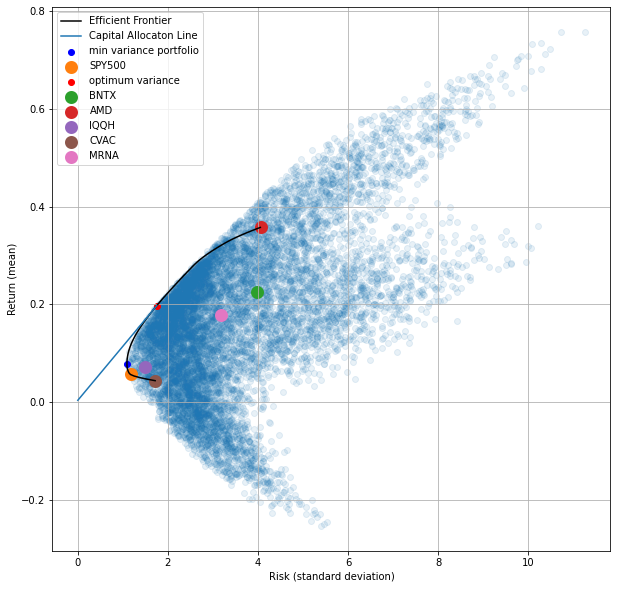

In [ ]:


fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black',label='Efficient Frontier');
plt.scatter([mv_risk], [mv_ret], c='blue',label='min variance portfolio');
plt.scatter(spy_market_risk, spy_market_return, label='SPY500',linewidth=7);
# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red',label='optimum variance');

for i in range(D):
  plt.scatter(single_asset_risks[i], single_asset_returns[i],label=names[i],linewidth=7);

# tangent line
x1 = 0
y1 = risk_free_rate
x2 = opt_risk
y2 = opt_ret
plt.plot([x1, x2], [y1, y2],label='Capital Allocaton Line');


plt.xlabel('Risk (standard deviation)')
plt.ylabel('Return (mean)')
plt.legend()
plt.grid(True)

In [ ]:
names


['BNTX', 'AMD', 'IQQH', 'CVAC', 'MRNA']

In [ ]:
DIVIDETO100=100

In [ ]:
def create_views_and_link_matrix(names, views):  
    r, c = len(views), len(names)
    Q = [views[i][3]/DIVIDETO100 for i in range(r)]  # view matrix
    P = np.zeros([r, c])
    nameToIndex = dict()
    for i, n in enumerate(names):
        nameToIndex[n] = i
    for i, v in enumerate(views):
        name1, name2 = views[i][0], views[i][2]
        P[i, nameToIndex[name2]] = +1 if views[i][1] == '=' else +1 #same value
        P[i, nameToIndex[name1]] = +1 if views[i][1] == '>' else -1
        P[i, nameToIndex[name2]] = -1 if views[i][1] == '>' else +1

    return np.array(Q), P



views = [
         #('MSFT', '=', 'MSFT', 17),
         ('AAPL', '=', 'AAPL', 25),
         ('AMD', '>', 'INTC', 20.5),
         #('GOOG', '<', 'TSLA', 10)
         ]
views=[]



Q, P = create_views_and_link_matrix(names, views)
print('Views Matrix')
display(pd.DataFrame({'Views':Q}))
print('Link Matrix')
display(pd.DataFrame(P))

Views Matrix


,Views


Link Matrix


,0,1,2,3,4


In [ ]:
# Calculates portfolio mean return
def port_mean(W, R):
    return np.sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
    return np.dot(np.dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
    return port_mean(W, R), port_var(W, C)

In [ ]:
from scipy.optimize import minimize
# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
    def fitness(W, R, C, r):
        # For given level of return r, find weights which minimizes portfolio variance.
        mean, var = port_mean_var(W, R, C)
        penalty = 100 * abs(
            mean - r)  # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
        return var + penalty

    frontier_mean, frontier_var, frontier_weights = [], [], []
    n = len(R)  # Number of assets in the portfolio
    for r in np.linspace(np.min(R), np.max(R), num=20):  # Iterate through the range of returns on Y axis
        W = np.ones([n]) / n  # start optimization with equal weights
        b_ = [(0.001, 0.999) for i in range(n)] #bounds
        c_ = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.})
        
        optimized = minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)
        if not optimized.success:
            raise BaseException(optimized.message)
        # add point to the efficient frontier [x,y] = [optimized.x, r]
        frontier_mean.append(r)
        frontier_var.append(port_var(optimized.x, C))
        frontier_weights.append(optimized.x)
    return np.array(frontier_mean), np.array(frontier_var), frontier_weights

In [ ]:
# Given risk-free rate, assets returns and covariances, this function calculates
# weights of tangency portfolio with respect to sharpe ratio maximization
def solve_weights(R, C, rf):
    def fitness(W, R, C, rf):
        mean, var = port_mean_var(W, R, C)  # calculate mean/variance of the portfolio
        util = (mean - rf) / np.sqrt(var)  # utility = Sharpe ratio
        return 1 / util  # maximize the utility, minimize its inverse value
    n = len(R)
    W = np.ones([n]) / n  # start optimization with equal weights
    b_ = [(0., 1.) for i in range(n)]  # weights for boundaries between 0%..100%. No leverage, no shorting
    c_ = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.})  # Sum of weights must be 100%
    optimized = minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
    if not optimized.success: raise BaseException(optimized.message)
    return optimized.x

In [ ]:
class Result:
    def __init__(self, W, tan_mean, tan_var, front_mean, front_var, front_weights):
        self.W=W
        self.tan_mean=tan_mean
        self.tan_var=tan_var
        self.front_mean=front_mean
        self.front_var=front_var
        self.front_weights=front_weights
        
def optimize_frontier(R, C, rf):
    W = solve_weights(R, C, rf)
    tan_mean, tan_var = port_mean_var(W, R, C)  # calculate tangency portfolio
    front_mean, front_var, front_weights = solve_frontier(R, C, rf)  # calculate efficient frontier
    # Weights, Tangency portfolio asset means and variances, Efficient frontier means and variances
    return Result(W, tan_mean, tan_var, front_mean, front_var, front_weights)

In [ ]:
returns

array([0.04163081, 0.22008677, 0.21126365, ..., 0.33683888, 0.06672212,
       0.13941823])

In [ ]:
R=returns
C=cov
rf=risk_free_rate

In [ ]:
tau = .025  # scaling factor

# Calculate omega - uncertainty matrix about views
omega = np.dot(np.dot(np.dot(tau, P), C), np.transpose(P))  # 0.025 * P * C * transpose(P)
print(omega)
# Calculate equilibrium excess returns with views incorporated
sub_a = np.linalg.inv(np.dot(tau, C))
sub_b = np.dot(np.dot(np.transpose(P), np.linalg.inv(omega)), P)
sub_c = np.dot(np.linalg.inv(np.dot(tau, C)), mean_return)
sub_d = np.dot(np.dot(np.transpose(P), np.linalg.inv(omega)), Q)
Pi_adj = np.dot(np.linalg.inv(sub_a + sub_b), (sub_c + sub_d))

#res3 = optimize_frontier(Pi + rf, C, rf)
res3 = optimize_frontier(Pi_adj+rf, C, rf)  
#res3 = optimize_frontier(Pi_adj, C, rf)  

[]


In [ ]:
pd.DataFrame([res3.W],columns=names)
print('bayesian return',res3.tan_mean)
print('bayesian risk',np.sqrt(res3.tan_var))

bayesian return 0.1950502593902491
bayesian risk 1.6943588176021949


In [ ]:
rsk=pd.Series(single_asset_risks,index=names,name='DAILY RISK %')
rsk['OPT_PORTFOLIO']=np.sqrt(res3.tan_var)
rsk=rsk.round(2)
rtr=pd.Series(single_asset_returns,index=names,name='CUMULATIVE RETURN %')
rtr['OPT_PORTFOLIO']=res3.tan_mean
rtr=(((1 + rtr/TOPERCENTAGE)**duration_days - 1)*TOPERCENTAGE).round(2)

wgh=pd.Series(res3.W,index=names,name='WEIGTHS %')
wgh['OPT_PORTFOLIO']=1
wgh=(wgh*TOPERCENTAGE).round(2)

pd.DataFrame(rtr).join(rsk).join(wgh)

,CUMULATIVE RETURN %,DAILY RISK %,WEIGTHS %
BNTX,76.50,3.99,15.38
AMD,146.46,4.07,28.25
IQQH,19.61,1.48,25.36
CVAC,11.57,1.72,13.54
MRNA,56.64,3.18,17.47
OPT_PORTFOLIO,63.40,1.69,100.00
